In [2]:
import pandas as pd
import numpy as np

datos = pd.read_csv("carros.csv")
datos.head()

,precio,vendido,edad_del_modelo,km_by_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
#situacion con los datos ordenados de la peor manera
datos_ord = datos.sort_values("vendido", ascending=True)
x_ord = datos_ord[["precio", "edad_del_modelo","km_by_year"]]
y_ord = datos_ord["vendido"]
datos_ord.head()

,precio,vendido,edad_del_modelo,km_by_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
import numpy as np

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con dummy stratified, 10 = [49.79, 53.45]


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desviacion_estandar = results['test_score'].std()
print("Accuracy con cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desviacion_estandar)*100, (media + 2 * desviacion_estandar) * 100))

Accuracy con cross validation, 10 = [73.83, 77.73]


In [6]:
#generando datos aleatorios del modelo de carro
np.random.seed(SEED)
datos['modelo'] = datos.edad_del_modelo + np.random.randint(-2, 3, size=10000)
datos.modelo = datos.modelo + abs(datos.modelo.min()) + 1
datos.head()

,precio,vendido,edad_del_modelo,km_by_year,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desviacion = results['test_score'].std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [8]:
# GroupKFold en un pipeline con StandardScaler y SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacion',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 76.68
Intervalo [74.28, 79.08]


In [9]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 75.78
Intervalo [73.67, 77.90]


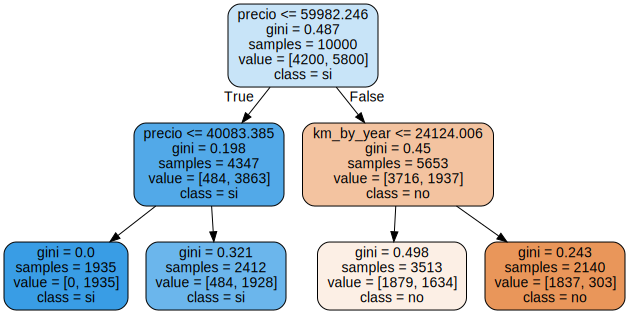

In [10]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=['no','si'],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [11]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 78.67
Intervalo [76.40, 80.94]


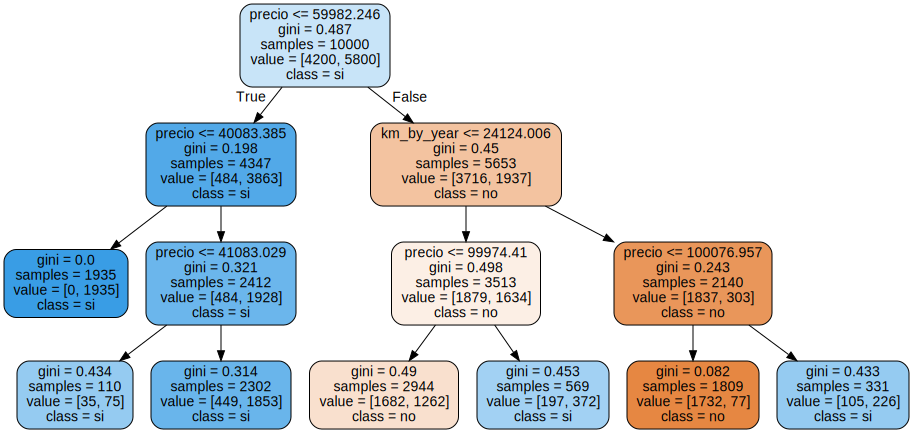

In [12]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_ord, y_ord)
features = x_ord.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True,
                class_names=['no','si'],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

In [13]:
# GroupKFold para analizar como el modelo se comporta con nuevos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy media 77.19
Intervalo [75.26, 79.13]


# Explorando hiper-parámetros en una dimensión

In [14]:
def iniciar_arbol_de_decision(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, training = %.2f, testing = %.2f' % (max_depth, train_score, test_score))
  tabla = [max_depth, train_score, test_score]
  return tabla

resultados = [iniciar_arbol_de_decision(i) for i in range(1,33)]
resultados = pd.DataFrame(resultados, columns=['max_depth','train','test'])
resultados.head()

Arbol max_depth = 1, training = 75.79, testing = 75.78
Arbol max_depth = 2, training = 75.79, testing = 75.78
Arbol max_depth = 3, training = 78.75, testing = 78.67
Arbol max_depth = 4, training = 78.79, testing = 78.63
Arbol max_depth = 5, training = 78.94, testing = 78.56
Arbol max_depth = 6, training = 79.17, testing = 78.12
Arbol max_depth = 7, training = 79.50, testing = 77.96
Arbol max_depth = 8, training = 79.89, testing = 77.86
Arbol max_depth = 9, training = 80.46, testing = 77.38
Arbol max_depth = 10, training = 81.16, testing = 77.19
Arbol max_depth = 11, training = 82.03, testing = 76.97
Arbol max_depth = 12, training = 82.89, testing = 76.49
Arbol max_depth = 13, training = 83.95, testing = 75.81
Arbol max_depth = 14, training = 85.03, testing = 75.66
Arbol max_depth = 15, training = 86.14, testing = 75.16
Arbol max_depth = 16, training = 87.19, testing = 75.11
Arbol max_depth = 17, training = 88.31, testing = 74.74
Arbol max_depth = 18, training = 89.26, testing = 74.33
A

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


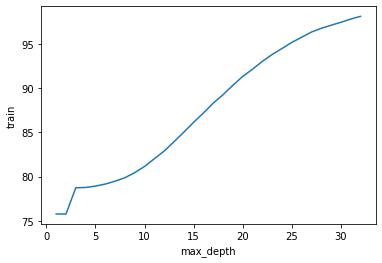

In [15]:
import seaborn as sns

sns.lineplot(x='max_depth', y='train', data=resultados)

# Overfit

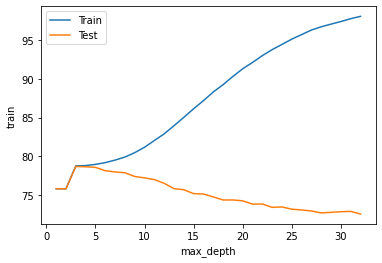

In [16]:
import matplotlib.pyplot as plt
sns.lineplot(x='max_depth', y='train', data=resultados)
sns.lineplot(x='max_depth', y='test', data=resultados)
plt.legend(['Train','Test'])

In [17]:
resultados.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Explorando hiper-parámetros en dos dimensiones

In [18]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  print('Arbol max_depth = %d, min_samples_leaf = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, train_score, test_score]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train','test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 32, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 64, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 32, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 64, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 4, min_samples_leaf = 32, training = 78.

,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [19]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [20]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,0.000000,0.536705,-0.027675
min_samples_leaf,0.000000,1.000000,-0.409676,0.349011
train,0.536705,-0.409676,1.000000,0.116466
test,-0.027675,0.349011,0.116466,1.000000


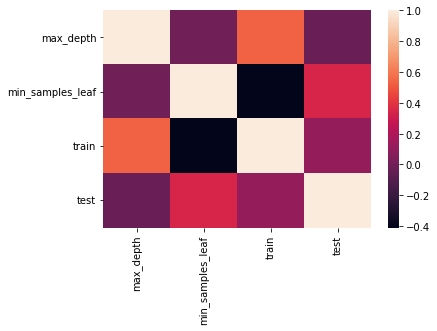

In [21]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32cb7a5f10>,
      dtype=object)

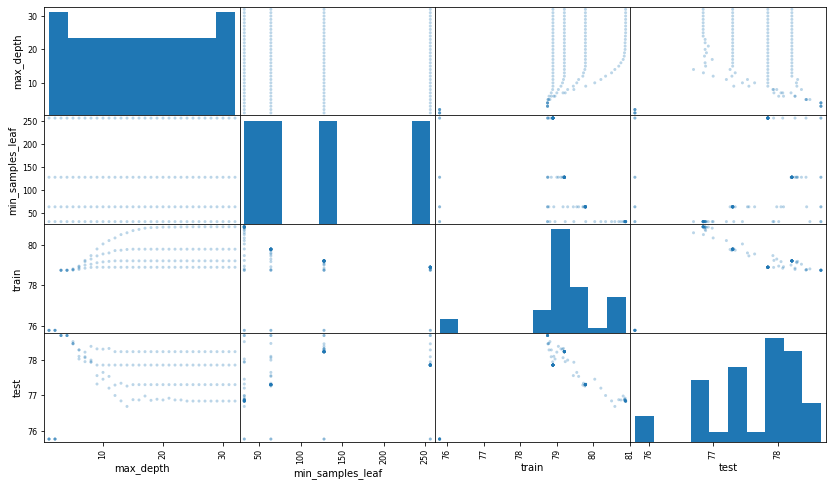

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(resultados, figsize = (14,8), alpha=0.3)

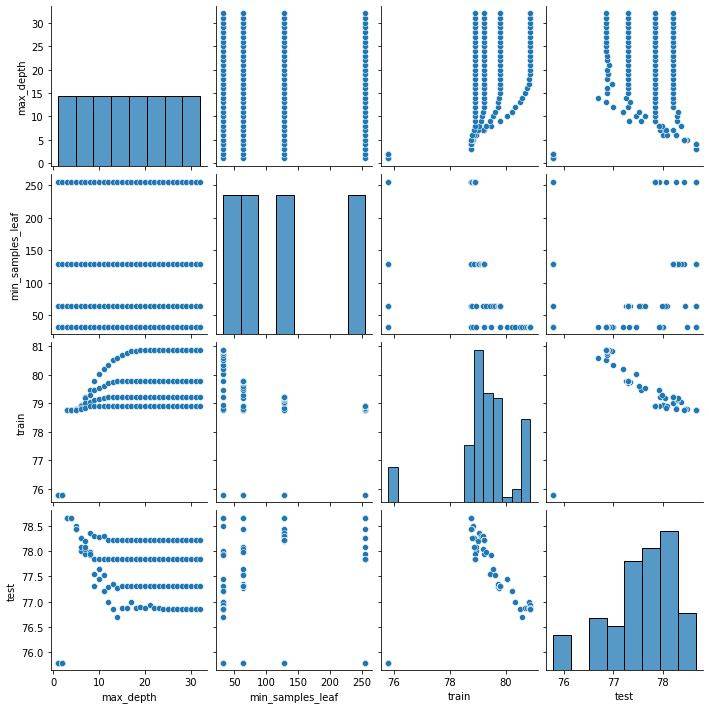

In [23]:
sns.pairplot(resultados)

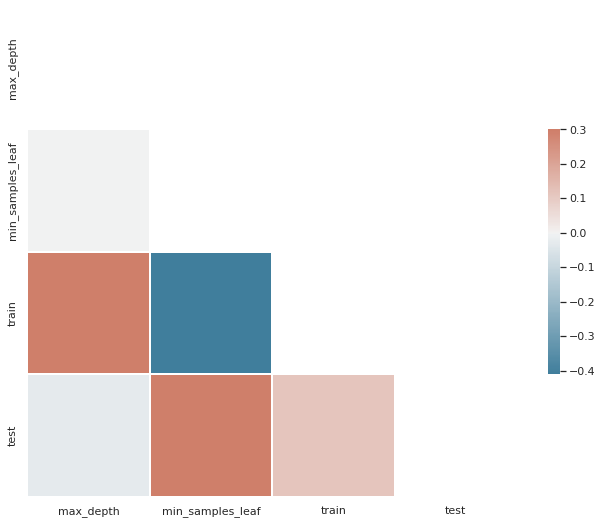

In [24]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
def buscar():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf)
      resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf','train','test'])
  return resultados

resultados = buscar()
resultados.head()

Arbol max_depth = 1, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 192, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 1, min_samples_leaf = 512, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 128, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 192, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 256, training = 75.79, testing = 75.78
Arbol max_depth = 2, min_samples_leaf = 512, training = 75.79, testing = 75.78
Arbol max_depth = 3, min_samples_leaf = 128, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 192, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 256, training = 78.75, testing = 78.67
Arbol max_depth = 3, min_samples_leaf = 512, training = 77.53, testing = 77.50
Arbol max_depth = 4, min_samples_leaf = 128, trainin

,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [26]:
corr = resultados.corr()

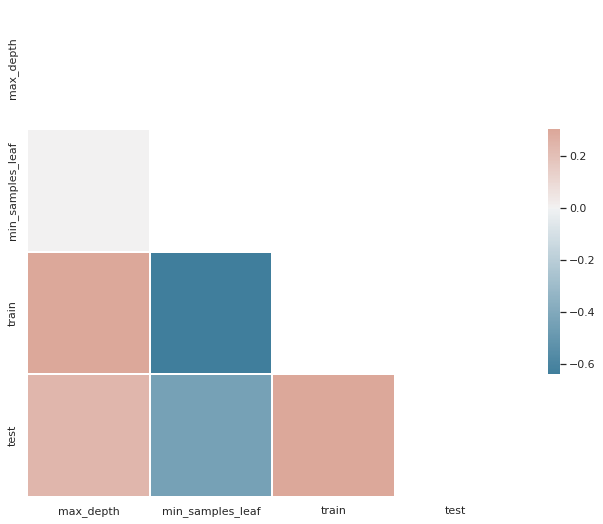

In [27]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# Explorando 3 dimensiones de hiper parámetros

In [29]:
def iniciar_arbol_de_decision(max_depth, min_samples_leaf, min_samples_split):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_ord, y_ord, cv = cv, groups = datos.modelo, return_train_score=True)
  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()
  train_score = results['train_score'].mean()*100
  test_score = results['test_score'].mean()*100
  #print('Arbol max_depth = %d, min_samples_leaf = %d, min_samples_split = %d, training = %.2f, testing = %.2f' % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  tabla = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabla

def buscar():
  resultados = []
  for max_depth in range(1,33):
    for min_samples_leaf in [32, 64, 128, 256]:
      for min_samples_split in [32, 64, 128, 256]:
        tabla = iniciar_arbol_de_decision(max_depth, min_samples_leaf,min_samples_split)
        resultados.append(tabla)
  resultados = pd.DataFrame(resultados, columns=['max_depth','min_samples_leaf', 'min_samples_split', 'train','test','fit_time', 'score_time'])
  return resultados

resultados = buscar()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.005966,0.001434
1,1,32,64,75.791169,75.784219,0.005568,0.001286
2,1,32,128,75.791169,75.784219,0.005949,0.001385
3,1,32,256,75.791169,75.784219,0.005663,0.001313
4,1,64,32,75.791169,75.784219,0.006090,0.001350


In [30]:
corr = resultados.corr()

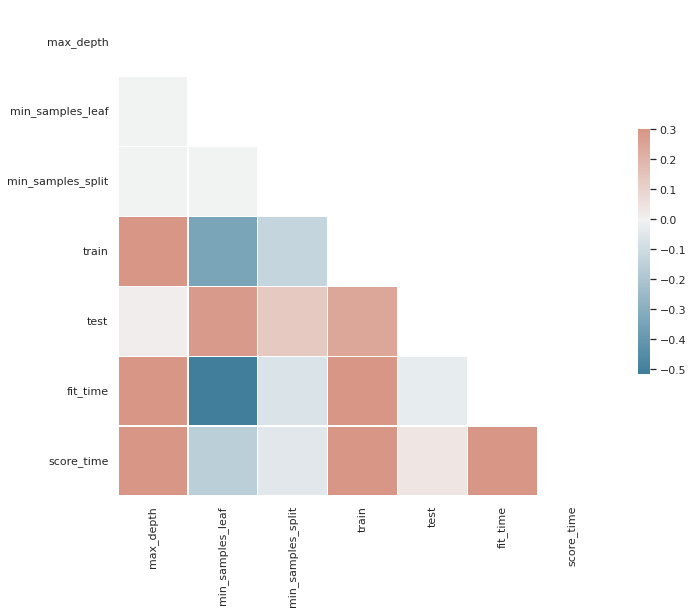

In [31]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.012052,0.001409
48,4,32,32,78.750993,78.672633,0.012632,0.001464
34,3,32,128,78.750993,78.672633,0.011455,0.001555
35,3,32,256,78.750993,78.672633,0.010845,0.001540
36,3,64,32,78.750993,78.672633,0.010755,0.001642


# Explorando espacio de hiper parámetros con GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth' : [3,5],
    'min_samples_split' : [32,64,128],
    'min_samples_leaf' : [32,64,128],
    'criterion' : ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = GroupKFold(n_splits = 10))

buscar.fit(x_ord, y_ord, groups = datos.modelo)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010627,0.000517,0.001394,0.000081,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.010931,0.000641,0.001450,0.000089,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.010793,0.000593,0.001424,0.000064,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.011225,0.001167,0.001572,0.000266,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.010726,0.000543,0.001485,0.000095,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,0.793667,0.793313,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [34]:
print(buscar.best_params_)
print(buscar.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [35]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [36]:
from sklearn.metrics import accuracy_score

#Escenario Optimista
prediccion = mejor.predict(x_ord)
accuracy = accuracy_score(prediccion, y_ord) * 100
print('Accuracy para los datos fue %.2f%%' % accuracy)

Accuracy para los datos fue 78.75%


# Nested Cross Validation
Escenario Real

In [37]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth' : [3,5],
    'min_samples_split' : [32,64,128],
    'min_samples_leaf' : [32,64,128],
    'criterion' : ['gini', 'entropy']
}

buscar = GridSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle=True))

buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011763,0.002820,0.001811,0.000484,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.009384,0.000135,0.001501,0.000093,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.009467,0.000207,0.001651,0.000244,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.009566,0.000167,0.001504,0.000053,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.009353,0.000081,0.001472,0.000034,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [39]:
def imprime_score(scores):
  media = scores.mean() * 100
  desviacion = scores.std() * 100
  print("Accuracy media %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desviacion, media + 2 * desviacion))

In [40]:
imprime_score(scores) 

Accuracy media 78.67
Intervalo [76.80, 80.54]


In [41]:
mejor = buscar.best_estimator_
print(mejor)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


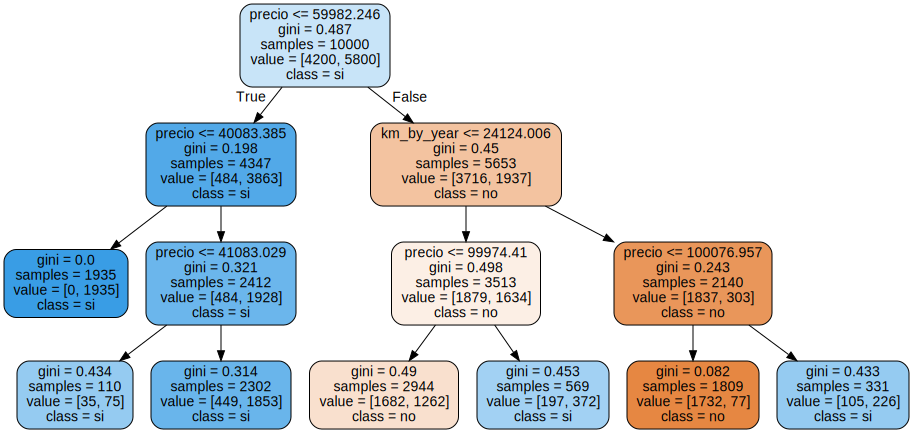

In [42]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True,
                class_names=['no','si'],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

# Búsqueda aleatoria: RandomSearch

In [43]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)

espacio_de_parametros = {
    'max_depth' : [3,5],
    'min_samples_split' : [32,64,128],
    'min_samples_leaf' : [32,64,128],
    'criterion' : ['gini', 'entropy']
}

buscar = RandomizedSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      n_iter = 16,
                      cv = KFold(n_splits = 5, shuffle=True),
                      random_state=SEED)

buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012630,0.000380,0.001521,0.000075,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.784,0.769,0.7985,0.793,0.7730,0.7835,0.011278,13
1,0.010336,0.001531,0.001560,0.000108,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
2,0.009407,0.000203,0.001503,0.000083,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.776,0.8025,0.793,0.7795,0.7870,0.009618,1
3,0.019866,0.001417,0.001551,0.000024,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7
4,0.019448,0.000617,0.001530,0.000015,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.784,0.769,0.8005,0.793,0.7730,0.7839,0.011825,7


In [44]:
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores) 

Accuracy media 78.71
Intervalo [77.49, 79.93]


In [45]:
mejor = buscar.best_estimator_
mejor

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=64,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

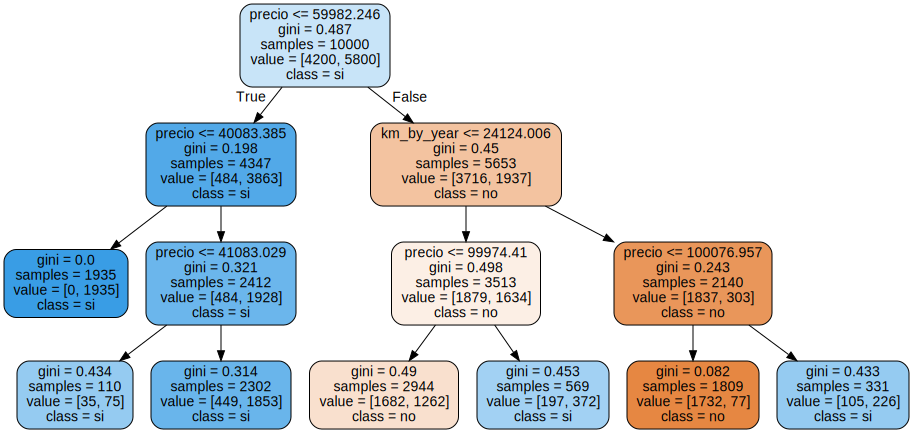

In [46]:
features = x_ord.columns
dot_data = export_graphviz(mejor, out_file=None, filled=True, rounded=True,
                class_names=['no','si'],
                feature_names = features)

graph = graphviz.Source(dot_data)
graph

# Personalizando el espacio de hiper parametros

In [47]:
from scipy.stats import randint

SEED=301
np.random.seed(SEED)

espacio_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

buscar = RandomizedSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      n_iter = 16,
                      cv = KFold(n_splits = 5, shuffle=True),
                      random_state=SEED)

buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014946,0.001935,0.001662,0.000171,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.7840,0.7760,0.8025,0.7930,0.7795,0.7870,0.009618,1
1,0.017320,0.000435,0.001615,0.000028,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7740,0.7725,0.7830,0.7805,0.7725,0.7765,0.004393,14
2,0.016289,0.000875,0.001801,0.000442,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7705,0.7745,0.7990,0.7790,0.7735,0.7793,0.010221,8
3,0.020812,0.001059,0.001733,0.000075,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.7575,0.7730,0.7725,0.7835,0.7560,0.7685,0.010378,16
4,0.017446,0.002561,0.001799,0.000376,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7705,0.7735,0.7995,0.7790,0.7745,0.7794,0.010413,7


In [48]:
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
mejor = buscar.best_estimator_
mejor

Accuracy media 78.71
Intervalo [77.49, 79.93]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=71, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [49]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending=False)
for index, row in resultados_ordenados_media.iterrows():
  print("%.3f +-(%.3f) %s" % (row.mean_test_score, row.std_test_score*2, row.params))

0.787 +-(0.019) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.784 +-(0.024) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.784 +-(0.024) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.781 +-(0.017) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +-(0.019) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.780 +-(0.012) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 103, 'min_samples_split': 96}
0.779 +-(0.021) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.779 +-(0.020) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.779 +-(0.009) {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 101, 'min_samples_split': 52}
0.779 +-(0.014) {'criterion': 'entropy', 'max_depth

# Una exploración más profunda de forma aleatoria

In [50]:
from scipy.stats import randint

SEED=564
np.random.seed(SEED)

espacio_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

buscar = RandomizedSearchCV(DecisionTreeClassifier(),
                      espacio_de_parametros,
                      n_iter = 64,
                      cv = KFold(n_splits = 5, shuffle=True),
                      random_state=SEED)

buscar.fit(x_ord, y_ord)
resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027001,0.000744,0.001602,0.000047,entropy,None,84,103,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.7780,0.7745,0.7735,0.7620,0.7625,0.7701,0.006583,62
1,0.009440,0.000222,0.001479,0.000020,gini,3,53,60,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.7905,0.7855,0.7915,0.7905,0.7765,0.7869,0.005607,1
2,0.016499,0.000409,0.001592,0.000026,gini,30,118,61,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.7775,0.7745,0.7785,0.7720,0.7875,0.7780,0.005273,18
3,0.032308,0.001465,0.001652,0.000028,entropy,None,53,85,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.7710,0.7780,0.7760,0.7650,0.7655,0.7711,0.005295,57
4,0.019036,0.000444,0.001847,0.000345,gini,10,44,67,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.7755,0.7780,0.7835,0.7695,0.7735,0.7760,0.004669,29


In [51]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending=False)
for index, row in resultados_ordenados_media.iterrows():
  print("%.3f +-(%.3f) %s" % (row.mean_test_score, row.std_test_score*2, row.params))

0.787 +-(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 33, 'min_samples_split': 77}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 38, 'min_samples_split': 113}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 60}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 61, 'min_samples_split': 86}
0.787 +-(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 49, 'min_samples_split': 58}
0.787 +-(0.011) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 58, 'min_samples_split': 118}
0.787 +-(0.011) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 122, 'min_samples_split': 117}
0.786 +-(0.013) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 39, 'min_samples_split': 73}
0.786 +-(0.013) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 45, 'min_samples_split': 65}
0.786 +-(0.014) {'criterion': 'entropy', 'max_depth': 5, 

In [52]:
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
imprime_score(scores)
mejor = buscar.best_estimator_
mejor

Accuracy media 78.69
Intervalo [77.64, 79.74]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=53, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Comparando GridSearchCV con RandomizedSearch (1 comparación)

In [53]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED=301
np.random.seed(SEED)

espacio_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
buscar = GridSearchCV(RandomForestClassifier(),
                      espacio_de_parametros,
                      cv = KFold(n_splits = 5, shuffle=True))

buscar.fit(x_ord, y_ord)
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)

resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

Tiempo 221.05 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043896,0.001824,0.004817,0.001112,True,gini,3,32,32,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7745,0.7560,0.7490,0.7850,0.7450,0.7619,0.015357,130
1,0.374743,0.011150,0.022729,0.001635,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7655,0.7555,0.7945,0.7850,0.7625,0.7726,0.014685,93
2,0.040759,0.002178,0.004096,0.000293,True,gini,3,32,64,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7635,0.7835,0.7845,0.7560,0.7731,0.011373,89
3,0.369386,0.006043,0.022288,0.001235,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7425,0.7550,0.7950,0.7850,0.7620,0.7679,0.019356,119
4,0.040155,0.001794,0.004471,0.000888,True,gini,3,32,128,10,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7755,0.7405,0.7485,0.7760,0.7630,0.7607,0.014250,135


In [54]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending=False)
for index, row in resultados_ordenados_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (row.mean_test_score, row.std_test_score*2, row.params))

0.780 +-(0.020) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.020) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 10}
0.778 +-(0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.027) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 10}
0.778 +-(0.033) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 100}


In [ ]:
tic = time.time()
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)

imprime_score(scores)
mejor = buscar.best_estimator_
print(mejor)

In [56]:
SEED=301
np.random.seed(SEED)

espacio_de_parametros = {
    "n_estimators" : [10, 100],
    "max_depth" : [3, 5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
buscar = RandomizedSearchCV(RandomForestClassifier(),
                      espacio_de_parametros,
                      n_iter = 20,
                      cv = KFold(n_splits = 5, shuffle=True))

buscar.fit(x_ord, y_ord)
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)

resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

Tiempo 32.12 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.450785,0.015950,0.022159,0.000677,100,32,128,3,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7740,0.7925,0.7775,0.7560,0.7742,0.011724,10
1,0.062071,0.003410,0.004220,0.000061,10,32,128,5,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.750,0.7785,0.7820,0.7785,0.7645,0.7707,0.011969,13
2,0.610812,0.006281,0.025016,0.001030,100,32,32,5,entropy,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.771,0.7745,0.7930,0.7785,0.7585,0.7751,0.011178,6
3,0.038226,0.001035,0.003701,0.000060,10,128,32,3,gini,True,"{'n_estimators': 10, 'min_samples_split': 128,...",0.750,0.7600,0.7450,0.7390,0.7520,0.7492,0.007026,20
4,0.060259,0.003465,0.003865,0.000141,10,64,32,3,entropy,False,"{'n_estimators': 10, 'min_samples_split': 64, ...",0.771,0.7740,0.7635,0.7370,0.7585,0.7608,0.013094,18


In [57]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending=False)
for index, row in resultados_ordenados_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (row.mean_test_score, row.std_test_score*2, row.params))

0.776 +-(0.025) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.023) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 128, 'max_depth': 3, 'criterion': 'gini', 'bootstrap': False}
0.776 +-(0.024) {'n_estimators': 100, 'min_samples_split': 64, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.776 +-(0.032) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False}
0.775 +-(0.035) {'n_estimators': 10, 'min_samples_split': 32, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': True}


In [58]:
tic = time.time()
scores = cross_val_score(buscar, x_ord, y_ord, cv = KFold(n_splits=5, shuffle=True))
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)

imprime_score(scores)
mejor = buscar.best_estimator_
print(mejor)

Tiempo 135.74 segundos
Accuracy media 77.59
Intervalo [76.47, 78.71]
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=32,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [59]:
SEED=301
np.random.seed(SEED)

espacio_de_parametros = {
    "n_estimators" :randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

tic = time.time()
buscar = RandomizedSearchCV(RandomForestClassifier(),
                      espacio_de_parametros,
                      n_iter = 80,
                      cv = KFold(n_splits = 5, shuffle=True))

buscar.fit(x_ord, y_ord)
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)

resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

Tiempo 110.24 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.369467,0.007785,0.020317,0.000915,False,gini,3,50,93,89,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7715,0.7620,0.7750,0.7855,0.7580,0.7704,0.009744,75
1,0.288602,0.002970,0.020461,0.004459,True,gini,3,88,104,80,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7715,0.7575,0.7925,0.7855,0.7575,0.7729,0.014277,63
2,0.280415,0.006274,0.017135,0.000243,True,gini,3,126,84,77,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7685,0.7695,0.7925,0.7795,0.7575,0.7735,0.011781,59
3,0.178542,0.003045,0.011620,0.000338,True,gini,3,57,73,50,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7670,0.7830,0.7865,0.7580,0.7733,0.010429,60
4,0.282694,0.006393,0.016820,0.000539,True,gini,4,52,88,68,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7720,0.7685,0.7930,0.7850,0.7585,0.7754,0.012220,30


In [60]:
resultados_ordenados_media = resultados.sort_values("mean_test_score", ascending=False)
for index, row in resultados_ordenados_media[:5].iterrows():
  print("%.3f +-(%.3f) %s" % (row.mean_test_score, row.std_test_score*2, row.params))

0.779 +-(0.025) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 84, 'min_samples_split': 89, 'n_estimators': 48}
0.778 +-(0.031) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 96, 'n_estimators': 18}
0.778 +-(0.032) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 121, 'min_samples_split': 47, 'n_estimators': 27}
0.778 +-(0.024) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 96, 'min_samples_split': 98, 'n_estimators': 11}
0.777 +-(0.029) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 63, 'min_samples_split': 88, 'n_estimators': 69}


# Si no pudiera usar cross validation

In [61]:
# 0.8 train     => entrenamiento
# 0.2 test      => prueba

from sklearn.model_selection import train_test_split

SEED=301
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x_ord, y_ord, test_size=0.2, shuffle=True, stratify=y_ord)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

espacio_de_parametros = {
    "n_estimators" :randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split" : randint(32, 129),
    "min_samples_leaf" : randint(32, 129),
    "bootstrap" : [True, False],
    "criterion" : ["gini", "entropy"]
}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
buscar = RandomizedSearchCV(RandomForestClassifier(),
                      espacio_de_parametros,
                      n_iter = 5,
                      cv = split)

buscar.fit(x_train, y_train)
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)

resultados = pd.DataFrame(buscar.cv_results_)
resultados.head()

Tiempo 1.12 segundos


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095319,0.0,0.007468,0.0,True,gini,5,89,58,24,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7885,0.7885,0.0,3
1,0.132321,0.0,0.007235,0.0,False,entropy,3,71,55,27,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7920,0.7920,0.0,1
2,0.083925,0.0,0.006032,0.0,True,entropy,3,33,99,21,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7910,0.7910,0.0,2
3,0.230952,0.0,0.016593,0.0,True,gini,3,98,100,67,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7785,0.7785,0.0,5
4,0.346667,0.0,0.015402,0.0,False,entropy,4,88,64,63,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7885,0.7885,0.0,3


In [63]:
tic = time.time()
scores = cross_val_score(buscar, x_test, y_test, cv = split)
tac = time.time()
tiempo_pasado = tac - tic
print("Tiempo %.2f segundos" % tiempo_pasado)
scores

Tiempo 0.73 segundos


array([0.732])